In [1]:
import numpy as np         
import os                  
import random 
import matplotlib.pyplot as plt

In [4]:
import cv2
TRAIN_DIR ='F:/Deep Learning/dataset/training_set'
TEST_DIR = 'F:/Deep Learning/dataset/test_set/'
IMG_SIZE = 50
LR = 1e-3

In [5]:
category=['cats','dogs']

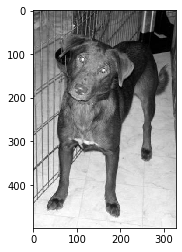

In [9]:
datadir='F:/Deep Learning/dataset/training_set'
category=['dogs','cats']
for i in category:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break  

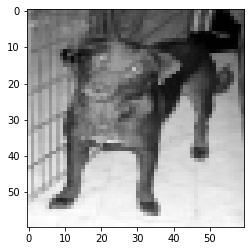

In [10]:
IMG_SIZE=60
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(new_array,cmap='gray')
plt.show()IMG_SIZE=60
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(new_array,cmap='gray')
plt.show()

In [11]:
training_data=[]
def create_training_data():
    for i in category:
        path=os.path.join(TRAIN_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [12]:
training_data

[[array([[138, 111,  89, ...,  90,  85,  83],
         [119,  96,  86, ...,  92,  77,  72],
         [131, 101, 100, ...,  81,  86,  77],
         ...,
         [249, 248, 249, ..., 235, 230, 225],
         [248, 245, 245, ..., 237, 229, 230],
         [247, 242, 245, ..., 243, 238, 237]], dtype=uint8), 0],
 [array([[110, 101, 104, ..., 124, 120, 121],
         [ 86, 106, 119, ..., 122, 123, 123],
         [124, 126, 122, ..., 123, 124, 121],
         ...,
         [202, 201, 201, ...,  96,  96,  96],
         [203, 197, 197, ...,  95,  96,  95],
         [200, 199, 202, ...,  94,  93,  93]], dtype=uint8), 0],
 [array([[186, 185, 182, ...,  34,  37,  36],
         [185, 183, 183, ...,  48,  36,  39],
         [182, 182, 183, ...,  57,  40,  32],
         ...,
         [161, 170, 172, ...,  69,  62,  61],
         [149, 157, 168, ...,  66,  65,  69],
         [165, 155, 154, ...,  65,  65,  68]], dtype=uint8), 0],
 [array([[ 14,  11,  21, ..., 115, 105, 165],
         [ 46,  54,  58, ..

In [13]:
len(training_data)

8000

In [14]:
import random
random.shuffle(training_data)

In [18]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
1
0
0
1


In [19]:
testing_data=[]
def create_testing_data():
    for i in category:
        path=os.path.join(TEST_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [20]:
testing_data

[[array([[ 66,  45,  78, ..., 135, 148, 146],
         [124, 123, 127, ..., 137, 151, 149],
         [ 93,  43,  56, ..., 145, 152, 154],
         ...,
         [126, 131, 130, ..., 144, 143, 142],
         [130, 128, 128, ..., 141, 145, 145],
         [128, 127, 125, ..., 142, 144, 144]], dtype=uint8), 0],
 [array([[ 24,  23,  23, ...,  43,  41,  31],
         [ 24,  24,  23, ...,  43,  41,  30],
         [ 24,  23,  24, ...,  43,  41,  31],
         ...,
         [131, 128, 125, ...,  28,  27,  26],
         [100, 104, 101, ...,  28,  28,  26],
         [ 97, 141, 145, ...,  28,  27,  27]], dtype=uint8), 0],
 [array([[ 7,  7,  7, ...,  2,  6,  3],
         [ 7,  7,  7, ...,  2,  4,  3],
         [ 7,  7,  7, ...,  7,  5,  7],
         ...,
         [24, 19, 24, ..., 23, 22, 19],
         [22, 21, 20, ..., 16, 18, 20],
         [24, 26, 23, ..., 20, 19, 18]], dtype=uint8), 0],
 [array([[ 42,  44, 104, ...,  47,  29,  27],
         [ 50,  47,  75, ...,  47,  22,  23],
         [ 38,  4

In [22]:
len(testing_data)

2000

In [23]:
import random
random.shuffle(testing_data)

In [24]:
for sample in testing_data[:10]:
    print(sample[1])

1
1
1
0
1
1
0
1
0
1


In [26]:
X=[]
y=[]

In [27]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [28]:
len(X)

8000

In [29]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X.shape

(8000, 60, 60, 1)

In [30]:
X.shape[1:]

(60, 60, 1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [32]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
X=X/255.0

In [36]:
X

array([[[[0.18039216],
         [0.18823529],
         [0.2       ],
         ...,
         [0.11372549],
         [0.1254902 ],
         [0.14509804]],

        [[0.17254902],
         [0.21960784],
         [0.20784314],
         ...,
         [0.11764706],
         [0.12156863],
         [0.1372549 ]],

        [[0.20392157],
         [0.2       ],
         [0.19607843],
         ...,
         [0.11764706],
         [0.10980392],
         [0.12156863]],

        ...,

        [[0.22352941],
         [0.15294118],
         [0.14117647],
         ...,
         [0.80784314],
         [0.77254902],
         [0.78039216]],

        [[0.34901961],
         [0.25098039],
         [0.21176471],
         ...,
         [0.83529412],
         [0.89411765],
         [0.85490196]],

        [[0.4       ],
         [0.35686275],
         [0.35686275],
         ...,
         [0.85490196],
         [0.88235294],
         [0.8627451 ]]],


       [[[0.29803922],
         [0.35686275],
         [0.35

In [37]:
y=np.array(y,dtype=np.uint8)
y

array([0, 0, 1, ..., 1, 1, 0], dtype=uint8)

In [38]:
model.fit(X,y,validation_split=0.3,epochs=10)

Epoch 1/10
175/175 [==============================] - 197s 1s/step - loss: 0.6940 - accuracy: 0.5048 - val_loss: 0.6933 - val_accuracy: 0.5038
Epoch 2/10
175/175 [==============================] - 184s 1s/step - loss: 0.6895 - accuracy: 0.5337 - val_loss: 0.6747 - val_accuracy: 0.6117
Epoch 3/10
175/175 [==============================] - 189s 1s/step - loss: 0.6809 - accuracy: 0.5641 - val_loss: 0.6630 - val_accuracy: 0.6221
Epoch 4/10
175/175 [==============================] - 186s 1s/step - loss: 0.6647 - accuracy: 0.6000 - val_loss: 0.6519 - val_accuracy: 0.6275
Epoch 5/10
175/175 [==============================] - 174s 994ms/step - loss: 0.6547 - accuracy: 0.6186 - val_loss: 0.6293 - val_accuracy: 0.6562
Epoch 6/10
175/175 [==============================] - 167s 955ms/step - loss: 0.6248 - accuracy: 0.6452 - val_loss: 0.5950 - val_accuracy: 0.6825
Epoch 7/10
175/175 [==============================] - 188s 1s/step - loss: 0.5980 - accuracy: 0.6839 - val_loss: 0.5694 - val_accuracy: 

In [39]:
def prepare(filepath):
    img_size=60
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size),interpolation=cv2.INTER_AREA)
    return np.array(new_array).reshape(-1,img_size,img_size,1)

In [46]:
a=prepare('G:/meow.jpg')
a=a/255
a

array([[[[0.23137255],
         [0.17647059],
         [0.10196078],
         ...,
         [0.41568627],
         [0.40392157],
         [0.36470588]],

        [[0.16470588],
         [0.16862745],
         [0.17647059],
         ...,
         [0.36862745],
         [0.40392157],
         [0.38039216]],

        [[0.22352941],
         [0.25490196],
         [0.21960784],
         ...,
         [0.11372549],
         [0.35686275],
         [0.3254902 ]],

        ...,

        [[0.21960784],
         [0.23529412],
         [0.23137255],
         ...,
         [0.21960784],
         [0.22352941],
         [0.22352941]],

        [[0.21568627],
         [0.23529412],
         [0.22745098],
         ...,
         [0.20784314],
         [0.21176471],
         [0.21568627]],

        [[0.20784314],
         [0.22745098],
         [0.21960784],
         ...,
         [0.19607843],
         [0.21176471],
         [0.20392157]]]])

In [47]:
pred=model.predict([a])
pred

array([[0.48467526]], dtype=float32)

In [48]:
model.predict_classes([a])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0]])

In [49]:
b=prepare('G:/dog.jpg')
b=b/255.0
b

array([[[[0.29803922],
         [0.35294118],
         [0.33333333],
         ...,
         [0.55294118],
         [0.4745098 ],
         [0.57647059]],

        [[0.29019608],
         [0.28235294],
         [0.35294118],
         ...,
         [0.51764706],
         [0.49019608],
         [0.68235294]],

        [[0.29803922],
         [0.32156863],
         [0.33333333],
         ...,
         [0.47843137],
         [0.49803922],
         [0.6       ]],

        ...,

        [[0.04313725],
         [0.05490196],
         [0.03921569],
         ...,
         [0.10588235],
         [0.09411765],
         [0.1372549 ]],

        [[0.05098039],
         [0.05098039],
         [0.03529412],
         ...,
         [0.12941176],
         [0.09019608],
         [0.14901961]],

        [[0.05490196],
         [0.04705882],
         [0.04313725],
         ...,
         [0.10196078],
         [0.08627451],
         [0.15686275]]]])

In [50]:
model.predict([b])

array([[0.21836182]], dtype=float32)

In [51]:
model.predict_classes([b])

array([[0]])

In [52]:
len(testing_data)

2000

In [53]:
x1=[]
y1=[]

In [54]:
for features,label in testing_data:
    x1.append(features)
    y1.append(label)

In [55]:
x1=np.array(x1).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x1

array([[[[ 80],
         [ 85],
         [ 92],
         ...,
         [105],
         [ 73],
         [ 50]],

        [[108],
         [102],
         [ 85],
         ...,
         [ 86],
         [ 53],
         [ 62]],

        [[113],
         [108],
         [ 85],
         ...,
         [ 67],
         [ 68],
         [ 68]],

        ...,

        [[ 38],
         [ 38],
         [ 39],
         ...,
         [193],
         [194],
         [189]],

        [[ 39],
         [ 38],
         [ 37],
         ...,
         [190],
         [192],
         [193]],

        [[ 37],
         [ 36],
         [ 33],
         ...,
         [192],
         [193],
         [199]]],


       [[[ 23],
         [ 14],
         [ 21],
         ...,
         [ 29],
         [ 29],
         [ 24]],

        [[ 22],
         [ 21],
         [ 17],
         ...,
         [ 23],
         [ 26],
         [ 28]],

        [[ 32],
         [ 42],
         [ 22],
         ...,
         [ 22],
         [

In [56]:
y1=np.array(y1,dtype=np.uint8)
y1

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [57]:
x1=x1/255.0

In [58]:
x1

array([[[[0.31372549],
         [0.33333333],
         [0.36078431],
         ...,
         [0.41176471],
         [0.28627451],
         [0.19607843]],

        [[0.42352941],
         [0.4       ],
         [0.33333333],
         ...,
         [0.3372549 ],
         [0.20784314],
         [0.24313725]],

        [[0.44313725],
         [0.42352941],
         [0.33333333],
         ...,
         [0.2627451 ],
         [0.26666667],
         [0.26666667]],

        ...,

        [[0.14901961],
         [0.14901961],
         [0.15294118],
         ...,
         [0.75686275],
         [0.76078431],
         [0.74117647]],

        [[0.15294118],
         [0.14901961],
         [0.14509804],
         ...,
         [0.74509804],
         [0.75294118],
         [0.75686275]],

        [[0.14509804],
         [0.14117647],
         [0.12941176],
         ...,
         [0.75294118],
         [0.75686275],
         [0.78039216]]],


       [[[0.09019608],
         [0.05490196],
         [0.08

In [59]:
model.predict_classes(x1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [60]:
y1[:5]

array([1, 1, 1, 0, 1], dtype=uint8)

In [61]:
model.predict_classes(x1[:5])

array([[1],
       [1],
       [1],
       [0],
       [1]])